<a href="https://colab.research.google.com/github/guiaraujo017/Dados-EBAC/blob/main/Profissao_Analista_de_dados_M16_2_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Aluno [Guilherme Araújo Vasconcelos](https://www.linkedin.com/in/guilherme-a-vasconcelos/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

A Loggi é uma das maiores empresas de logística no Brasil, com seus dados disponibilizados é possível entender como funcionam as entregas e até mesmo verificar pontos de melhoria.

A análise exploratória dos dados de entrega vai proporcionar um olhar crítico e objetivo nas oprerações da Loggi no DF.

## 2\. Pacotes e bibliotecas

In [ ]:
import json

import pandas as pd
import geopy
from geopy.geocoders import Nominatim
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.extra.rate_limiter import RateLimiter

## 3\. Exploração de dados

In [ ]:
# faça o código de exploração de dados:
#
# - coleta de dados;
# - wrangling da estrutura;
# - exploração do schema;
# - etc.

In [ ]:
# Os dados estão disponíveis no link:

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

# Vamos ler o arquivo:

with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

Com o arquivo transformado em **dicionário** **Python**, podemos iniciar a exploração dos dados.

In [ ]:
# Número de linhas
len(data)

199

In [ ]:
# Nome de cada coluna
exemplo = data[0]
print(exemplo.keys())

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])


In [ ]:
exemplo['name']

'cvrp-2-df-33'

In [ ]:
# Região do centro de distribuição
exemplo['region']

'df-2'

In [ ]:
# Local do centro de distribuição
exemplo['origin']

{'lng': -48.05498915846707, 'lat': -15.83814451122274}

In [ ]:
# Capacidade do veículo de entrega
exemplo['vehicle_capacity']

180

O item "deliveries" é um outro dicionário dentro do dicionário

In [ ]:
# Local de entrega
exemplo['deliveries']

[{'id': '313483a19d2f8d65cd5024c8d215cfbd',
  'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294},
  'size': 9},
 {'id': '320c94b17aa685c939b3f3244c3099de',
  'point': {'lng': -48.11819489551, 'lat': -15.850772371049631},
  'size': 2},
 {'id': '3663b42f4b8decb33059febaba46d5c8',
  'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764},
  'size': 1},
 {'id': 'e11ab58363c38d6abc90d5fba87b7d7',
  'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456},
  'size': 2},
 {'id': '54cb45b7bbbd4e34e7150900f92d7f4b',
  'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708},
  'size': 7},
 {'id': '71271df40c3188cda88266f9969a5a9',
  'point': {'lng': -48.120447632397045, 'lat': -15.8477803198514},
  'size': 10},
 {'id': 'be0cd4bee278b16f3473c8fb05e96464',
  'point': {'lng': -48.121801874785255, 'lat': -15.852089389271015},
  'size': 7},
 {'id': 'e0fffb7150a2a202adb36e3f2fd5cc96',
  'point': {'lng': -48.11630043339824, 'lat': -15.85121514743728},
  'size': 10

Para pegarmos um valor dentro do deliveries, devemos então selecionar qual informação dentro desse dicionário estamos interessados

In [ ]:
# Latitude da entrega
exemplo['deliveries'][0]['point']['lat']


-15.848929154862294

In [ ]:
# Longitude da entrega
exemplo['deliveries'][0]['point']['lng']

-48.11618888384239

In [ ]:
# Transformar nossos dados em um DataFrame

deliveries_df = pd.DataFrame(data)

In [ ]:
# 5 primeiros itens do nosso DataFrame
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
# 5 últimos itens do nosso DataFrame
deliveries_df.tail()

,name,region,origin,vehicle_capacity,deliveries
194,cvrp-1-df-59,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'fc800db1942651f8195f870c5930ca26', 'p..."
195,cvrp-0-df-87,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '3d50e820e1c16621e1fa19f1a7df0c56', 'p..."
196,cvrp-1-df-83,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'e6cffd090ce2a7bd0e0292f1ed9acd3', 'po..."
197,cvrp-2-df-7,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '51b1354b02a20d919b83bb664ea4d845', 'p..."
198,cvrp-2-df-62,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '1a54fdc3c8748ab714841127950e6b3d', 'p..."


In [ ]:
# Os dados da coluna origin estão aninhados, então vamos usar o normalize para poder trabalhar com esses dados. o hub_origin_df vai ser o novo DataFrame com as coordenadas do centro de distribuição.

hub_origin_df = pd.json_normalize(deliveries_df['origin'])
hub_origin_df.head()


,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [ ]:
# Com os dados "achatados", podemos juntar ao DataFrame original e retirar a coluna Origin, para evitar valores duplicados.

deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
# Agora vamos renomear as colunas "lng" e "lat" para descrever melhor o seu valor, longitude e latitude do centro de distribuição

deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
# A coluna deliveries apresenta problema parecido com a coluna origin
deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries')
deliveries_exploded_df.head()


,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [ ]:
# Vamos dividir a coluna deliveries e juntar as 3 colunas em um único DataFrame

deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [ ]:
# Igual no último exemplo da coluna Oirigin, vamos excluir a coluna deliveries no DataFrame original para evitar a redundância de dados

deliveries_df = deliveries_df.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [ ]:
# Agora nosso DataFrame original tem 636149 linhas, equivalente ao número de entregas

len(deliveries_df)

636149

## 4\. Manipulação

In [ ]:
# faça o código de manipulação de dados:
#
# - enriquecimento;
# - controle de qualidade;
# - etc.

In [ ]:
# Estrutura do DataFrame após as adições e manipulações, 8 colunas e 636149 linhas

deliveries_df.shape

(636149, 8)

In [ ]:
# Nome das colunas

deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'delivery_size', 'delivery_lng', 'delivery_lat'],
      dtype='object')

In [ ]:
# Informações gerais do DataFrame. O DataFrame não possui nenhum item nulo

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


In [ ]:
# Detalhes das colunas categóricas

deliveries_df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


In [ ]:
# Detalhes das colunas com INT

deliveries_df.select_dtypes('int64').describe().transpose()

# A capacidade do veículo sempre é 180 para todos os casos nesse DataFrame
# A menor entrega é do tamanho 1 e a maior 10, sendo a média das entregas 5.5

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


In [ ]:
# Detalhes das colunas com FLOAT
# Essa demonstração não faz muito sentido, apenas trouxe para mostrar que é possível fazer essa análise.

deliveries_df.select_dtypes('float64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hub_lng,636149.0,-47.949902,0.091875,-48.054989,-48.054989,-47.893662,-47.893662,-47.802665
hub_lat,636149.0,-15.802359,0.053463,-15.838145,-15.838145,-15.805118,-15.805118,-15.657014
delivery_lng,636149.0,-47.946087,0.112769,-48.280779,-48.035911,-47.928967,-47.883394,-47.310611
delivery_lat,636149.0,-15.809492,0.082462,-16.050028,-15.842795,-15.814033,-15.769516,-15.500355


In [ ]:
# Mais uma vez, checar se tem valores nulos no DataFrame

deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
dtype: bool

In [ ]:
# Os dados podem auxiliar nossa vizualização ainda mais.
# Vamos criar um DataFrame com apenas os 3 pontos de distribuição, tirando os duplicados

hub_df = deliveries_df[['region', 'hub_lng', 'hub_lat']]
hub_df = hub_df.drop_duplicates().sort_values(by='region').reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [ ]:
# Vamos usar o Nominatim para fazer o serviço de geodecodificação do HUB DF-1

geolocator = Nominatim(user_agent='ebac_geocoder')
location = geolocator.reverse('-15.805118, -47.893662')

print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 46401425,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 66353368,
  "lat": "-15.805173062181177",
  "lon": "-47.89372326538893",
  "class": "highway",
  "type": "residential",
  "place_rank": 26,
  "importance": 0.10000999999999993,
  "addresstype": "road",
  "name": "SQS 303",
  "display_name": "SQS 303, Asa Sul, Brasília, Plano Piloto, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 70342-010, Brasil",
  "address": {
    "road": "SQS 303",
    "neighbourhood": "SQS 303",
    "suburb": "Asa Sul",
    "city": "Brasília",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Feder

In [ ]:
# O geocoder tem o limite de uma verificação por segundo

geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
# Criando o DataFrame um pouco mais detalhado com as informações do HUB

hub_df['coordinates']=hub_df['hub_lat'].astype(str) + ', ' + hub_df['hub_lng'].astype(str)
hub_df['geodata'] = hub_df['coordinates'].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [ ]:
# A coluna geodata está aninhada e precisamos transformar

hub_geodata_df = pd.json_normalize(hub_df['geodata'].apply(lambda data:data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [ ]:
# Separando a Cidade do Bairro
hub_geodata_df = hub_geodata_df[['address.town', 'address.suburb', 'address.city']]
hub_geodata_df.rename(columns={'address.town': 'hub_town', 'address.suburb': 'hub_suburb', 'address.city': 'hub_city'}, inplace=True)
hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
hub_geodata_df['hub_suburb'] = np.where(hub_geodata_df['hub_suburb'].notna(), hub_geodata_df['hub_suburb'], hub_geodata_df['hub_city'])
hub_geodata_df = hub_geodata_df.drop('hub_town', axis=1)
hub_geodata_df.head()

<ipython-input-29-5b17e8c15f1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={'address.town': 'hub_town', 'address.suburb': 'hub_suburb', 'address.city': 'hub_city'}, inplace=True)
<ipython-input-29-5b17e8c15f1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
<ipython-input-29-5b17e8c15f1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


In [ ]:
# Agora que retiramos a Cidade e Bairro dos hubs, podemos colocar no DataFrame original

hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df =hub_df[['region','hub_suburb', 'hub_city']]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how="inner", on="region")
deliveries_df = deliveries_df[["name", "region", "hub_lng", "hub_lat", "hub_city", "hub_suburb", "vehicle_capacity", "delivery_size", "delivery_lng", "delivery_lat"]]
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


In [ ]:
# O mesmo vai ser feito para as entregas

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

In [ ]:
# Novo DataFrame
deliveries_geodata_df = pd.read_csv('deliveries-geodata.csv')
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
# Juntar o novo DataFrame, utilizando apenas cidade e bairro de entrega, com o original

deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[['delivery_city', 'delivery_suburb']], how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
# Checar informações do DataFrame

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 58.2+ MB


In [ ]:
# Temos alguns dados faltando nas colunas cidade e bairro de entrega

deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

In [ ]:
# Porcentagem de valores nulos na cidade de entrega

100 * (deliveries_df['delivery_city'].isna().sum()/ len(deliveries_df))

0.26754738276724477

In [ ]:
# Porcentagem de valores nulos no bairro de entrega

100 * (deliveries_df['delivery_suburb'].isna().sum()/ len(deliveries_df))

25.133262804783158

In [ ]:
# Ranking das cidades com mais entregas

prop_df = deliveries_df[['delivery_city']].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_city       
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
Name: count, dtype: float64

In [ ]:
# Ranking dos bairros com mais entregas

prop_df = deliveries_df[['delivery_suburb']].value_counts()/ len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_suburb 
Brasília            0.084564
Asa Norte           0.076639
Taguatinga          0.063363
Asa Sul             0.059263
Águas Claras        0.056598
Guará               0.055619
Samambaia           0.026514
Sobradinho          0.018148
Recanto das Emas    0.015029
P Sul               0.012807
Name: count, dtype: float64

In [ ]:
# O centro de distribuição que mais tem entregas é o centro localizado em Brasília
prop_df = deliveries_df[['hub_city']].value_counts()/ len(deliveries_df)
prop_df.sort_values(ascending=False).head()

hub_city  
Brasília      0.478988
Taguatinga    0.410783
Sobradinho    0.110229
Name: count, dtype: float64

## 5\. Visualização

In [ ]:
# faça o código de visualização de dados:
#
# - produza pelo menos duas visualizações;
# - adicione um pequeno texto com os insights encontrados;
# - etc.

In [ ]:
# Vamos iniciar a construção do mapa de entregas

!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

In [ ]:
mapa = geopandas.read_file('distrito-federal.shp')
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


In [ ]:
# Cada "point" é um ponto no mapa
hub_df = deliveries_df[['region', 'hub_lng', 'hub_lat']].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df['hub_lng'], hub_df['hub_lat']))
geo_hub_df.head()

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


In [ ]:
geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df['delivery_lng'], deliveries_df['delivery_lat']))
geo_deliveries_df.head(10)

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)
5,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,10,-48.120448,-15.847780,Ceilândia,P Sul,POINT (-48.12045 -15.84778)
6,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.121802,-15.852089,Ceilândia,P Sul,POINT (-48.12180 -15.85209)
7,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,10,-48.116300,-15.851215,Ceilândia,P Sul,POINT (-48.11630 -15.85122)
8,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116317,-15.849660,Ceilândia,P Sul,POINT (-48.11632 -15.84966)
9,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,8,-48.123115,-15.849925,Ceilândia,P Sul,POINT (-48.12311 -15.84993)


<ipython-input-44-7c86d0b892ed>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


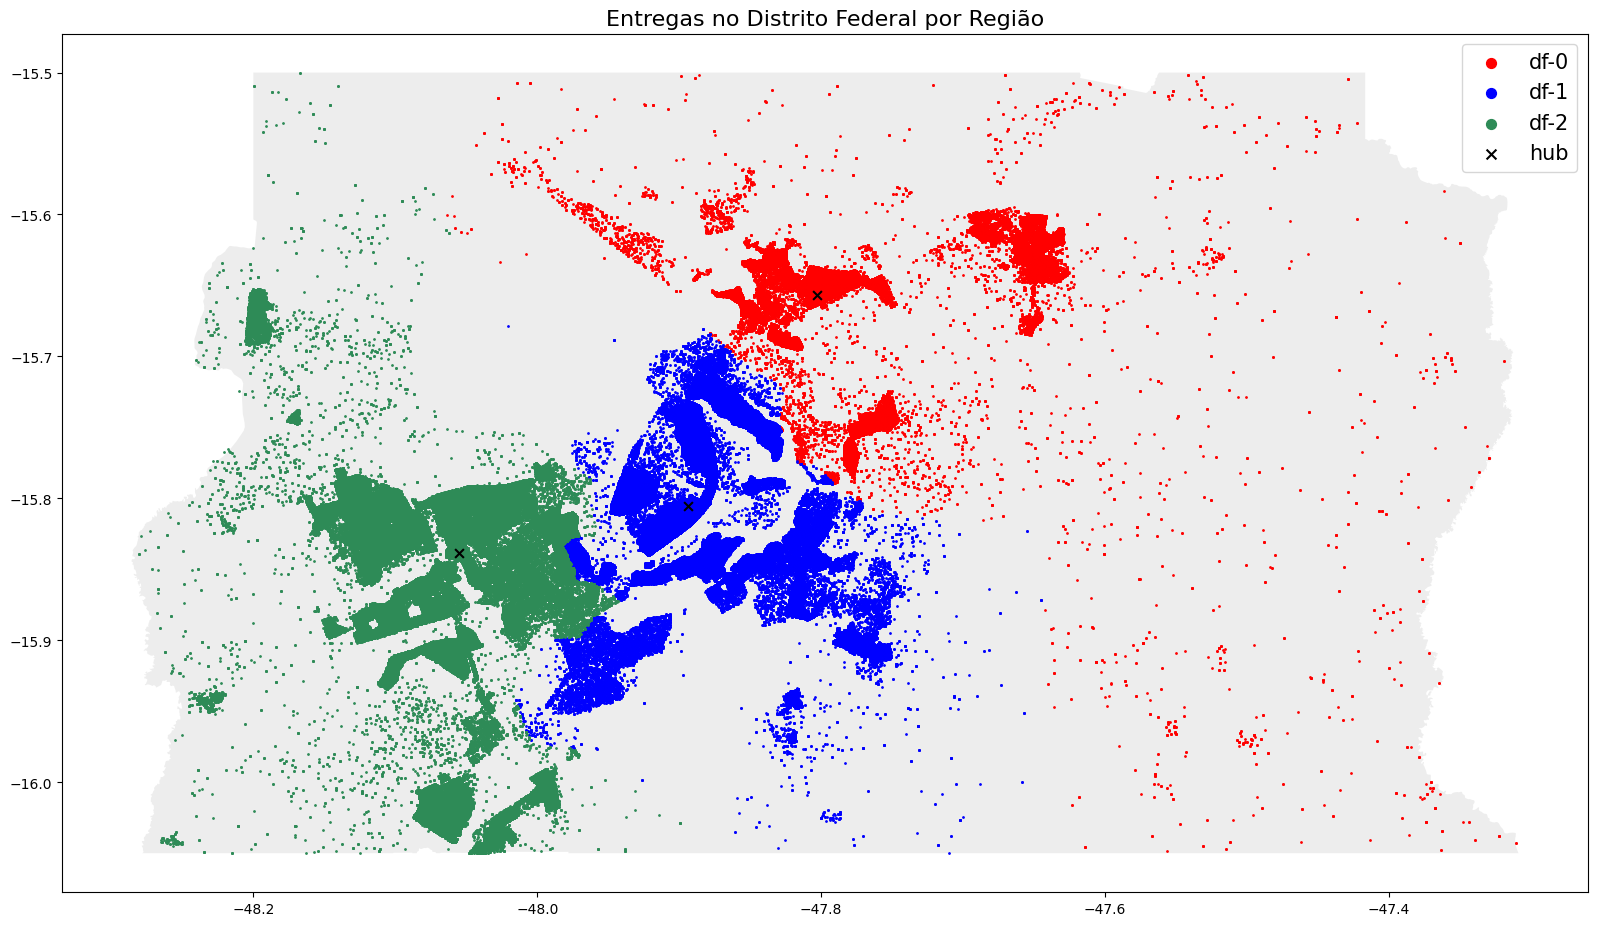

In [ ]:
# cria o plot vazio
fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

# plot mapa do distrito federal em cima do plot vazio criado anteriormente
mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

# plot das entregas, que vai ser sobrepondo no plot vazio
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="red", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="blue", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="seagreen", label="df-2")

# plot dos hubs
geo_hub_df.plot(ax=ax, markersize=40, marker="x", color="black", label="hub")

# plot da legenda
plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

O centro de distribuição DF-0 é o centro com menos entregas, apesar de ter as entregas mais dispersas que os outros dois centros.

O Centro DF-1 e DF-2 tem quase o mesmo número de entregas e suas entregas são muito mais concentradas, o DF-1 mais ainda.

Df-1 e DF-2 são entregas em áreas mais urbanas no DF, onde fica a maior parte da população, enquanto o DF-0 fica responsável pelas entregas em áreas mais rurais onde a densidade populacional é menor.

In [ ]:
# Entregas por região

data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.rename(columns={0: "region_percent"}, inplace=True)
data.head()

,region,vehicle_capacity,proportion
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


<ipython-input-46-4e5092e1fa1e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="proportion", ci=None, palette="pastel")
<ipython-input-46-4e5092e1fa1e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="proportion", ci=None, palette="pastel")


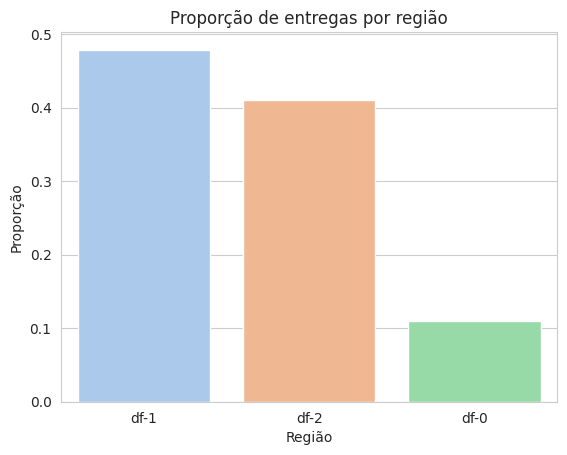

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=data, x="region", y="proportion", ci=None, palette="pastel")
  grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Proporção');

Esse barplot traz a confirmação visual de que os centros 1 e 2 tem mais entregas que o centro 0.

Apesar dessa diferença entre entregas do DF-0 em relação aos outros centros, a capacidade de entrega entre os centros é o mesmo - todos os 3 tem a capacidade 180.

Até que ponto seria interessante manter essa capacidade do DF-0? Com 11% de todas as entregas e a mesma capacidade de entrega, inicialmente, não parece nada ideal.

De acordo com os dados que temos, e sem saber os motivos dessa decisão pelos executivos da Loggi, idealmente para diminuirmos o tempo de entrega dos centros 1 e 2, que possuem um volume muito maior, o correto seria uma realocação de veículos do DF-0. Inclusive, nas regiões de "fronteira" entre o DF-0 e DF-1, as entregas que antes eram feitas pelo DF-0 podem ser passadas para o DF-1 (após a transferência de parte da frota) e com isso manter o foco do Centro de Distribuição de Sobradinho cada mais responsável pelas áreas mais afastadas.

Com mais veículos disponíveis, onde a demanda é maior, a Loggi pode entregar com um tempo menor e até mesmo aumentar sua capacidade de entregas nos locais de alta demanda sem comprometer o tempo de entrega.
